Text(0, 0.5, 'Discharge Capacity (Ah)')

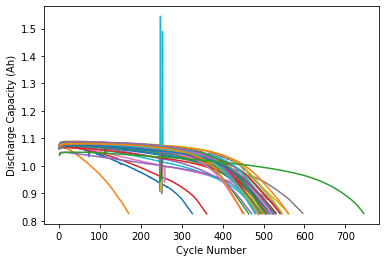

In [1]:
#load all the pickle file in the batch dictionary format
#LoadBatch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

batch1 = pickle.load(open(r'C:\Users\satsin\batch1.pkl','rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']
numBat1 = len(batch1.keys())
batch2 = pickle.load(open(r'C:\Users\satsin\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']
numBat2 = len(batch2.keys())
# batch3 = pickle.load(open(r'C:\Users\satsin\batch3.pkl','rb'))
# # remove noisy channels from batch3
# del batch3['b3c37']
# del batch3['b3c2']
# del batch3['b3c23']
# del batch3['b3c32']
# del batch3['b3c42']
#del batch3['b3c43']
#numBat3 = len(batch3.keys())
#numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch2}
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

#Batch_1 = pd.DataFrame(data=batch1)
#Batch_1.to_excel('summary1.xlsx')
#Batch_2 = pd.DataFrame(data=batch2)
#Batch_2.to_excel('summary2.xlsx')
#Batch_3 = pd.DataFrame(data=batch3)
#Batch_3.to_excel('summary3.xlsx')

# test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
# train_ind = np.arange(1,(numBat1+numBat2-1),2)
#secondary_test_ind = np.arange(numBat-numBat3,numBat)

In [2]:
df = pd.DataFrame(bat_dict)

In [3]:
df.head()

,b2c0,b2c1,b2c2,b2c3,b2c4,b2c5,b2c6,b2c10,b2c11,b2c12,...,b2c38,b2c39,b2c40,b2c41,b2c42,b2c43,b2c44,b2c45,b2c46,b2c47
cycle_life,[[300.0]],[[148.0]],[[438.0]],[[335.0]],[[444.0]],[[480.0]],[[511.0]],[[561.0]],[[477.0]],[[458.0]],...,[[465.0]],[[459.0]],[[499.0]],[[429.0]],[[466.0]],[[462.0]],[[457.0]],[[487.0]],[[429.0]],[[713.0]]
charge_policy,1C(4%)-6C,2C(10%)-6C,2C(2%)-5C,2C(7%)-5.5C,3.6C(22%)-5.5C,3.6C(2%)-4.85C,3.6C(30%)-6C,3.6C(9%)-5C,4C(13%)-5C,4C(31%)-5,...,5.6C(47%)-4C,5.6C(58%)-3.5C,5.6C(5%)-4.75C,5.6C(65%)-3C,6C(20%)-4.5C,6C(31%)-4.25C,6C(40%)-4C,6C(4%)-4.75C,6C(52%)-3.5C,6C(60%)-3C
summary,"{'IR': [0.017542101, 0.017505454, 0.017570902,...","{'IR': [0.017852232, 0.017582141, 0.018061424,...","{'IR': [0.017804198, 0.017894397, 0.017902471,...","{'IR': [0.017053859, 0.016825944, 0.016992988,...","{'IR': [0.017030258, 0.016936054, 0.016789593,...","{'IR': [0.017228829, 0.017180175, 0.01708005, ...","{'IR': [0.017036749, 0.016829265, 0.016633883,...","{'IR': [0.018386904, 0.018265773, 0.01822805, ...","{'IR': [0.017747378, 0.017606791, 0.017619114,...","{'IR': [0.017311905, 0.017133227, 0.017068474,...",...,"{'IR': [0.017908165, 0.017847016, 0.017769802,...","{'IR': [0.018178858, 0.018174672, 0.018061638,...","{'IR': [0.017504752, 0.017582053, 0.017494036,...","{'IR': [0.017931128, 0.0179385, 0.017922211, 0...","{'IR': [0.017401671, 0.017394457, 0.017247235,...","{'IR': [0.018279195, 0.01812768, 0.018153407, ...","{'IR': [0.017798344, 0.01761589, 0.017666645, ...","{'IR': [0.017350584, 0.017153347, 0.017201968,...","{'IR': [0.017926272, 0.017752018, 0.017708456,...","{'IR': [0.017933726, 0.017923383, 0.017898172,..."
cycles,"{'0': {'I': [0.0, 0.15983060909090907, 0.24964...","{'0': {'I': [0.0, 0.2200386727272727, 0.359885...","{'0': {'I': [0.0, 0.23980574545454544, 0.37949...","{'0': {'I': [0.0, 0.19963350909090907, 0.33992...","{'0': {'I': [0.0, 0.3238305181818181, 0.467627...","{'0': {'I': [0.0, 0.32376202727272724, 0.50394...","{'0': {'I': [0.0, 0.2878613909090909, 0.503755...","{'0': {'I': [0.0, 0.25191133636363633, 0.43193...","{'0': {'I': [0.0, 0.23988723636363637, 0.43981...","{'0': {'I': [0.0, 0.23994272727272722, 0.43985...",...,"{'0': {'I': [0.0, 0.3354887545454545, 0.504445...","{'0': {'I': [0.0, 0.49707932727272724, 0.66572...","{'0': {'I': [0.0, 0.3923832272727273, 0.673072...","{'0': {'I': [0.0, 0.31128623636363634, 0.55942...","{'0': {'I': [0.0, 0.30023401818181816, 0.47515...","{'0': {'I': [0.0, 0.4190895818181818, 0.661905...","{'0': {'I': [0.0, 0.2987046636363636, 0.599566...","{'0': {'I': [0.0, 0.3656976909090909, 0.548508...","{'0': {'I': [0.0, 0.29520554545454547, 0.53541...","{'0': {'I': [0.0, 0.35800239999999994, 0.60128..."


In [ ]:
df1 = df.transpose()

In [43]:
df1.index

Index(['b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10',
       'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20',
       'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28',
       'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36',
       'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44',
       'b2c45', 'b2c46', 'b2c47'],
      dtype='object')

In [6]:
df2 = pd.DataFrame(df1['cycles'][0])

In [7]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
I,"[0.0, 0.15983060909090907, 0.2496493909090909,...","[0.0, 0.18980286363636362, 0.3098921363636364,...","[0.0, 0.18965460909090906, 0.2997892545454545,...","[0.0, 0.15969536363636364, 0.2898398272727272,...","[0.0, 0.18972483636363635, 0.2797915727272727,...","[0.0, 0.16006036363636364, 0.2796762636363636,...","[0.0, 0.1797554727272727, 0.26958985454545453,...","[0.0, 0.1697705, 0.28992132727272724, 0.389606...","[0.0, 0.17988725454545454, 0.26993664545454543...","[0.0, 0.16986759999999998, 0.26981267272727266...",...,"[0.0, 0.22974968181818178, 0.4297100454545454,...","[0.0, 0.22977049090909088, 0.4298175454545454,...","[0.0, 0.22977309090909087, 0.4198195727272727,...","[0.0, 0.22978002727272728, 0.4197953, 0.609713...","[0.0, 0.2295780181818182, 0.4297195818181818, ...","[0.0, 0.20967049999999998, 0.4097297, 0.589830...","[0.0, 0.22976181818181818, 0.41965138181818173...","[0.0, 0.22984244545454546, 0.4196626454545454,...","[0.0, 0.22971933636363637, 0.4299241818181818,...","[0.0, 0.21975430909090907, 0.40992043636363634..."
Qc,"[0.0, 2.1295496e-06, 4.7414956e-06, 4.7414956e...","[0.0, 3.5587982e-06, 9.3333074e-06, 9.3333074e...","[0.0, 1.5894876e-06, 1.5894876e-06, 1.5894876e...","[0.0, 1.8780502e-06, 1.8780502e-06, 1.8780502e...","[0.0, 3.5667738e-06, 3.5667738e-06, 3.5667738e...","[0.0, 1.4049505e-06, 1.4049505e-06, 1.4049505e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.5198053e-06, 1.5198053e-06, 1.5198053e...","[0.0, 1.7539915e-06, 1.7539915e-06, 1.7539915e...","[0.0, 3.2619203e-06, 3.2619203e-06, 3.2619203e...",...,"[0.0, 5.905044e-06, 5.905044e-06, 5.905044e-06...","[0.0, 7.1089621e-06, 7.1089621e-06, 3.0068539e...","[0.0, 4.0457262e-06, 4.0457262e-06, 4.0457262e...","[0.0, 7.295112e-06, 7.295112e-06, 7.295112e-06...","[0.0, 2.4835047e-06, 2.4835047e-06, 2.4835047e...","[0.0, 4.7493068e-06, 4.7493068e-06, 4.7493068e...","[0.0, 6.3054727e-06, 6.3054727e-06, 3.6906407e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00020405097, ...","[0.0, 3.9111405e-06, 3.9111405e-06, 4.3474702e...","[0.0, 1.95794e-06, 1.95794e-06, 1.95794e-06, 6..."
Qd,"[0.0, 5.2515647e-10, 5.2515647e-10, 5.2515647e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.4411074e-10, 1.4411074e-10, 1.4411074e...","[0.0, 5.0030802e-10, 5.0030802e-10, 5.0030802e...","[0.0, 4.8637375e-11, 4.8637375e-11, 4.8637375e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 3.9948347e-11, 3.9948347e-11, 3.9948347e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 3.3018313e-10, 3.3018313e-10, 3.3018313e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Qdlin,"[-0.00046503738485040617, -0.00042241219603156...","[-0.0004883653644255656, -0.000443199905585994...","[-0.00019313416102554262, -0.00016687394644773...","[-0.00016719378497630403, -0.00014107110585413...","[-0.0004917980918351589, -0.000444739655699836...","[-0.0004163984732073457, -0.000376841162677316...","[-0.00018099142985896632, -0.00015357041615237...","[-0.0004973700730679896, -0.000455575316171333...","[-0.00033985385036987525, -0.00030297794848647...","[-0.00038772898983498237, -0.00035033383669911...",...,"[-0.0008445046316539201, -0.000777634650311997...","[-0.002294753107187145, -0.0021492403645173848...","[-0.0008764467479912528, -0.000807938432586106...","[-0.0007766035102508016, -0.000745241776163824...","[-0.0005525138646004775, -0.000526762934416850...","[-0.

In [8]:
df3 = df2.transpose()

In [9]:
df3.head()

,I,Qc,Qd,Qdlin,T,Tdlin,V,dQdV,t
0,"[0.0, 0.15983060909090907, 0.2496493909090909,...","[0.0, 2.1295496e-06, 4.7414956e-06, 4.7414956e...","[0.0, 5.2515647e-10, 5.2515647e-10, 5.2515647e...","[-0.00046503738485040617, -0.00042241219603156...","[30.076599, 30.076599, 30.076599, 30.076599, 3...","[29.29294580646865, 29.292973974381148, 29.292...","[2.401875, 2.412272, 2.4226775, 2.4348855, 2.4...","[-0.012820233718934582, -0.004273411239644861,...","[0.0, 0.0036516666667012034, 0.004511666666561..."
1,"[0.0, 0.18980286363636362, 0.3098921363636364,...","[0.0, 3.5587982e-06, 9.3333074e-06, 9.3333074e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0004883653644255656, -0.000443199905585994...","[29.833899, 29.833899, 29.833899, 29.833899, 2...","[27.259974686233686, 27.261727494182438, 27.26...","[2.456265, 2.4685102, 2.4815564, 2.4922719, 2....","[0.0, -0.00013309003629011123, -0.000109531828...","[0.0, 0.003921666666671323, 0.0051866666668502..."
2,"[0.0, 0.18965460909090906, 0.2997892545454545,...","[0.0, 1.5894876e-06, 1.5894876e-06, 1.5894876e...","[0.0, 1.4411074e-10, 1.4411074e-10, 1.4411074e...","[-0.00019313416102554262, -0.00016687394644773...","[28.419994, 28.419994, 28.419994, 28.419994, 2...","[29.537236492934355, 29.53722781017724, 29.537...","[2.4562345, 2.4684415, 2.480763, 2.4917989, 2....","[0.0, 0.0, 0.0, 0.0, -8.539029417549226e-05, -...","[0.0, 0.0038166666667772613, 0.005041666666753..."
3,"[0.0, 0.15969536363636364, 0.2898398272727272,...","[0.0, 1.8780502e-06, 1.8780502e-06, 1.8780502e...","[0.0, 5.0030802e-10, 5.0030802e-10, 5.0030802e...","[-0.00016719378497630403, -0.00014107110585413...","[30.129168, 30.129168, 30.129168, 30.129168, 3...","[29.361064551080926, 29.36143836032881, 29.361...","[2.4514318, 2.4614244, 2.4746346, 2.4877658, 2...","[-0.025418870516995574, -0.008472956838998525,...","[0.0, 0.003616666666736516, 0.0050733333334695..."
4,"[0.0, 0.18972483636363635, 0.2797915727272727,...","[0.0, 3.5667738e-06, 3.5667738e-06, 3.5667738e...","[0.0, 4.8637375e-11, 4.8637375e-11, 4.8637375e...","[-0.0004917980918351589, -0.000444739655699836...","[30.298557, 30.298557, 30.298557, 30.298557, 3...","[27.826763990915662, 27.807896158035977, 27.79...","[2.445663, 2.4584661, 2.4684825, 2.482142, 2.4...","[0.0, 0.0, 0.0, 0.0, -1.6118713203033914e-05, ...","[0.0, 0.0038850000002033386, 0.004851666666703..."


In [11]:
df4 = pd.DataFrame(df3['I'])

In [12]:
df4.head()

,I
0,"[0.0, 0.15983060909090907, 0.2496493909090909,..."
1,"[0.0, 0.18980286363636362, 0.3098921363636364,..."
2,"[0.0, 0.18965460909090906, 0.2997892545454545,..."
3,"[0.0, 0.15969536363636364, 0.2898398272727272,..."
4,"[0.0, 0.18972483636363635, 0.2797915727272727,..."


In [13]:
df5 = pd.DataFrame(df3['I'][0],columns= ['I'])

In [15]:
df5.head()

,I
0,0.000000
1,0.159831
2,0.249649
3,0.339715
4,0.429629


In [14]:
df7 = pd.DataFrame(df3['Qc'][0],columns= ['Qc'])

In [16]:
df7.head()

,Qc
0,0.000000
1,0.000002
2,0.000005
3,0.000005
4,0.000005


In [19]:
df8 = df5.transpose()

In [20]:
df9 = df8.append(df7.transpose())

In [21]:
df5 = df9.transpose()

In [22]:
df5.head()

,I,Qc
0,0.000000,0.000000
1,0.159831,0.000002
2,0.249649,0.000005
3,0.339715,0.000005
4,0.429629,0.000005


In [23]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       1308 non-null   float64
 1   Qc      1308 non-null   float64
dtypes: float64(2)
memory usage: 20.6 KB


In [8]:
df7 = pd.DataFrame(df3['Qc'][0],columns= ['Qc'])

NameError: name 'df3' is not defined

In [95]:
df8 = df5.transpose()
df9 = df8.append(df7.transpose())
df6 = df9.transpose()

In [96]:
df6.head()

,I,Qc,t,t
0,0.000000,0.000000,0.000000,0.000000
1,0.159831,0.000002,0.003652,0.003652
2,0.249649,0.000005,0.004512,0.004512
3,0.339715,0.000005,0.005542,0.005542
4,0.429629,0.000005,0.006505,0.006505


In [2]:
#Function to extract data cycle wise for each cell
#insert the cell no and cycle number to extract the data
#cell no varies from b1c0 to b3c43 and cycle number varies from 0 to 2300
def cycle(df):
    import pandas as pd
    cell_no = input("Enter the cell no.:")
    Index = int(input("Enter the index value:"))
    df1 = df.transpose()
    df2 = pd.DataFrame(df1['cycles'][cell_no])
    df3 = df2.transpose()
    df4 = pd.DataFrame()#df3['I'][Index],columns= ['I'])
    for i in list(df3):
        df5 = pd.DataFrame(df3[i][Index],columns = [i])
        df6 = df4.transpose()
        df7 = df6.append(df5.transpose())
        df4 = df7.transpose()
        df4.to_csv('C:\\Users\\satsin\\Desktop\\Battery life\\Cycle_'+str(cell_no)+'_'+str(Index)+'.csv')
    return(df4.shape)

In [3]:
cycle(df)

NameError: name 'df' is not defined

In [31]:
#Test for the above finction
cell_no = input("Enter the cell no.:")
Index = int(input("Enter the index value:"))
df1 = df.transpose()
df2 = pd.DataFrame(df1['cycles'][Index])
df3 = df2.transpose()
df4 = pd.DataFrame(df3['I'][Index],columns= ['I'])
for i in list(df3):
    #df4 = pd.DataFrame(df3[i][Index],columns = [i])
    df5 = pd.DataFrame(df3[i][Index],columns = [i])
    df6 = df4.transpose()
    df7 = df6.append(df5.transpose())
    df4 = df7.transpose()
    print(df4.head())

Enter the cell no.:b3c0
Enter the index value:0
          I         I
0  0.000000  0.000000
1  0.159831  0.159831
2  0.249649  0.249649
3  0.339715  0.339715
4  0.429629  0.429629
          I         I        Qc
0  0.000000  0.000000  0.000000
1  0.159831  0.159831  0.000002
2  0.249649  0.249649  0.000005
3  0.339715  0.339715  0.000005
4  0.429629  0.429629  0.000005
          I         I        Qc            Qd
0  0.000000  0.000000  0.000000  0.000000e+00
1  0.159831  0.159831  0.000002  5.251565e-10
2  0.249649  0.249649  0.000005  5.251565e-10
3  0.339715  0.339715  0.000005  5.251565e-10
4  0.429629  0.429629  0.000005  5.251565e-10
          I         I        Qc            Qd     Qdlin
0  0.000000  0.000000  0.000000  0.000000e+00 -0.000465
1  0.159831  0.159831  0.000002  5.251565e-10 -0.000422
2  0.249649  0.249649  0.000005  5.251565e-10 -0.000382
3  0.339715  0.339715  0.000005  5.251565e-10 -0.000343
4  0.429629  0.429629  0.000005  5.251565e-10 -0.000306
          I     

In [9]:
#function to extract all the data for different batches in different sheet cell wise for cycle data
#Create one excel file in the shared location to save all the records and run the script in append mode,'a'

def cycle(df):
    for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        cell_2 = pd.DataFrame.from_dict({(j,k): cell_1['cycles'][j][k] 
                           for j in cell_1['cycles'].keys() 
                           for k in cell_1['cycles'][i].keys()},
                       orient='index')
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\extracted files\\Cycle_batch2.xlsx'
        with pd.ExcelWriter(s_name,engine="openpyxl",mode='a') as writer:
            d_name='Sheet_'+str(i)
            cell_2.to_excel(writer, sheet_name=d_name)
        
        #print(cell_3)
        
    return cell_2.shape

In [10]:
cycle(df)

(745, 9)

In [ ]:
#function to extract all the data for different batches in different sheet cell wise for summary data
#Create one excel file in the shared location to save all the records and run the script in append mode,'a'
def summary(df):
    for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        df3 = pd.DataFrame(cell_1['summary'][i])
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\summary_batch2.xlsx'
        with pd.ExcelWriter(s_name,engine="openpyxl",mode='a') as writer:
            d_name='Sheet_'+str(i)
            df3.to_excel(writer, sheet_name=d_name)
    return df3.shape

In [ ]:
summary(df)

In [13]:
#Variance for all the cell 
for i in list(df):
    b2c22 = pd.DataFrame(df[i])
    b2c22_1 = b2c22.transpose()
    b2c22_2 = pd.DataFrame.from_dict({(j,k): b2c22_1['cycles'][j][k] 
                       for j in b2c22_1['cycles'].keys() 
                       for k in b2c22_1['cycles'][i].keys()},
                   orient='index')
    Qdlin = b2c22_2['Qdlin'][99]-b2c22_2['Qdlin'][9]
    Qdlin1 = pd.DataFrame(Qdlin)
    Cycle = pd.DataFrame(b2c22_1['cycle_life'])
    variance = np.var(Qdlin1)
    print(Cycle,'%.12f'%variance)
    #pd.to_csv('C:\\Users\\satsin\\Desktop\\Battery life\Cycle,np.var(Qdlin1))#,np.mean(Qdlin1))

     cycle_life
b2c0  [[300.0]] 0.001795919468
     cycle_life
b2c1  [[148.0]] 0.001875422289
     cycle_life
b2c2  [[438.0]] 0.000321174621
     cycle_life
b2c3  [[335.0]] 0.001176125917
     cycle_life
b2c4  [[444.0]] 0.000444626099
     cycle_life
b2c5  [[480.0]] 0.000249634716
     cycle_life
b2c6  [[511.0]] 0.000569653085
      cycle_life
b2c10  [[561.0]] 0.000236421300
      cycle_life
b2c11  [[477.0]] 0.000344573529
      cycle_life
b2c12  [[458.0]] 0.000478509041
      cycle_life
b2c13  [[483.0]] 0.000653404308
      cycle_life
b2c14  [[485.0]] 0.000317137935
      cycle_life
b2c17  [[494.0]] 0.000372398911
      cycle_life
b2c18  [[487.0]] 0.000296718995
      cycle_life
b2c19  [[461.0]] 0.000483053375
      cycle_life
b2c20  [[502.0]] 0.000190135646
      cycle_life
b2c21  [[489.0]] 0.000297484026
      cycle_life
b2c22  [[513.0]] 0.000279031438
      cycle_life
b2c23  [[527.0]] 0.000297673970
      cycle_life
b2c24  [[495.0]] 0.000201464296
      cycle_life
b2c25  [[461.0]] 

In [22]:
Variance(df)

(      cycle_life
 b2c47  [[713.0]],
 0    0.000085
 dtype: float64,
 0   -0.012528
 dtype: float64)

In [11]:
b2c0 = pd.DataFrame(df['b2c0'])

In [12]:
b2c0.head()

,b2c0
cycle_life,[[300.0]]
charge_policy,1C(4%)-6C
summary,"{'IR': [0.017542101, 0.017505454, 0.017570902,..."
cycles,"{'0': {'I': [0.0, 0.15983060909090907, 0.24964..."


In [13]:
b2c0_1 = b2c0.transpose()

In [14]:
b2c0_1.head()

,cycle_life,charge_policy,summary,cycles
b2c0,[[300.0]],1C(4%)-6C,"{'IR': [0.017542101, 0.017505454, 0.017570902,...","{'0': {'I': [0.0, 0.15983060909090907, 0.24964..."


In [15]:
b2c0_2 = pd.DataFrame.from_dict({(i,j): b2c0_1['cycles'][i][j] 
                           for i in b2c0_1['cycles'].keys() 
                           for j in b2c0_1['cycles'][i].keys()},
                       orient='index')

In [16]:
b2c0_2.tail()

I  \
b2c0 321  [0.0, 0.20967049999999998, 0.4097297, 0.589830...   
     322  [0.0, 0.22976181818181818, 0.41965138181818173...   
     323  [0.0, 0.22984244545454546, 0.4196626454545454,...   
     324  [0.0, 0.22971933636363637, 0.4299241818181818,...   
     325  [0.0, 0.21975430909090907, 0.40992043636363634...   

                                                         Qc  \
b2c0 321  [0.0, 4.7493068e-06, 4.7493068e-06, 4.7493068e...   
     322  [0.0, 6.3054727e-06, 6.3054727e-06, 3.6906407e...   
     323  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00020405097, ...   
     324  [0.0, 3.9111405e-06, 3.9111405e-06, 4.3474702e...   
     325  [0.0, 1.95794e-06, 1.95794e-06, 1.95794e-06, 6...   

                                                         Qd  \
b2c0 321  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     322  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     323  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     324  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     325  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                      Qdlin  \
b2c0 321  [-0.001328785548027196, -0.0012342289608339306...   
     322  [-0.0007719826194103727, -0.000728533602004043...   
     323  [-0.0005934448774446233, -0.000562642844062253...   
     324  [-0.0007046565202412854, -0.000670952311954868...   
     325  [-0.0011457277983899243, -0.001071705421729110...   

                                                          T  \
b2c0 321  [28.413012, 28.413012, 28.413012, 28.413012, 2...   
     322  [28.827686, 28.827686, 28.827686, 28.827686, 2...   
     323  [29.368692, 29.368692, 29.368692, 29.368692, 2...   
     324  [30.556498, 30.556498, 30.556498, 30.556498, 3...   
     325  [28.963293, 28.963293, 28.963293, 28.963293, 2...   

                                                      Tdlin  \
b2c0 321  [27.635231347275706, 27.635229402056613, 27.63...   
     322  [29.92526239935248, 29.925262346815995, 29.925...   
     323  [28.965464934957588, 28.965465959327496, 28.96...   
     324  [27.590043381349986, 27.590043875835967, 27.59...   
     325  [28.909718988338625, 28.90971898954793, 28.909...   

                                                          V  \
b2c0 321  [2.6244159, 2.6343598, 2.6454787, 2.6565166, 2...   
     322  [2.6371064, 2.6477437, 2.6581779, 2.6693139, 2...   
     323  [2.6329188, 2.6433206, 2.6536078, 2.6644206, 2...   
     324  [2.6305919, 2.6413398, 2.6523862, 2.6636243, 2...   
     325  [2.6347222, 2.64502, 2.6555533, 2.6662107, 2.6...   

                                                       dQdV  \
b2c0 321  [-0.004297835971040904, -0.007341289151029526,...   
     322  [-0.0010897250907335302, -0.001089725090733530...   
     323  [-0.00875527801186464, -0.010568433943341143, ...   
     324  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     325  [-0.0005155303862931612, -0.000515530386293161...   

                                                          t  
b2c0 321  [0.0, 0.004188333333392317, 0.0063250000001668...  
     322  [0.0, 0.004444999999638336, 0.0064733333332696...  
     323  [0.0, 0.004391666666682188, 0.0064316666665642...  
     324  [0.0, 0.0044883333335747014, 0.006581666666897...  
     325  [0.0, 0.004243333333579358, 0.0062699999999798...

In [18]:
V10 = pd.DataFrame(b2c0_2['V'][10])
V100 = pd.DataFrame(b2c0_2['V'][100])
Qd10 = pd.DataFrame(b2c0_2['Qd'][10])
Qd100 = pd.DataFrame(b2c0_2['Qd'][100])

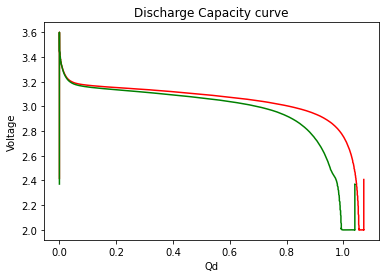

In [19]:
plt.plot(Qd10,V10,color='r')
plt.plot(Qd100,V100,color='g')
plt.xlabel('Qd')
plt.ylabel('Voltage')
plt.title('Discharge Capacity curve')
plt.show()

In [20]:
Qdlin = b2c0_2['Qdlin'][100]-b2c0_2['Qdlin'][10]

In [21]:
b2c0_2['Qdlin'][100]

array([-4.20120782e-04, -3.82336070e-04, -3.45977954e-04, -3.10929852e-04,
       -2.77075181e-04, -2.44297357e-04, -2.12479798e-04, -1.81505922e-04,
       -1.51259144e-04, -1.21622882e-04, -9.24805525e-05, -6.37155733e-05,
       -3.52113611e-05, -6.85133291e-06,  2.14810943e-05,  4.99025034e-05,
        7.85294775e-05,  1.07478600e-04,  1.36866452e-04,  1.66809619e-04,
        1.97424683e-04,  2.28807035e-04,  2.60944272e-04,  2.93789796e-04,
        3.27296998e-04,  3.61419267e-04,  3.96109993e-04,  4.31322758e-04,
        4.67053845e-04,  5.03395942e-04,  5.40454952e-04,  5.78336782e-04,
        6.17147334e-04,  6.56992516e-04,  6.97976468e-04,  7.40123469e-04,
        7.83346982e-04,  8.27552303e-04,  8.72644733e-04,  9.18529568e-04,
        9.65112108e-04,  1.01230212e-03,  1.06007314e-03,  1.10844630e-03,
        1.15744385e-03,  1.20708805e-03,  1.25740116e-03,  1.30840543e-03,
        1.36012869e-03,  1.41264140e-03,  1.46603386e-03,  1.52039644e-03,
        1.57581952e-03,  

In [22]:
b2c0_2['Qdlin'][10]

array([-3.80398549e-04, -3.49499024e-04, -3.18714658e-04, -2.88035433e-04,
       -2.57451333e-04, -2.26952343e-04, -1.96528444e-04, -1.66169622e-04,
       -1.35865858e-04, -1.05607137e-04, -7.53834420e-05, -4.51847566e-05,
       -1.50010642e-05,  1.51776517e-05,  4.53614077e-05,  7.55602204e-05,
        1.05784106e-04,  1.36043082e-04,  1.66347163e-04,  1.96706368e-04,
        2.27134697e-04,  2.57716239e-04,  2.88594945e-04,  3.19916692e-04,
        3.51827352e-04,  3.84472802e-04,  4.17998915e-04,  4.52546998e-04,
        4.88202666e-04,  5.25014352e-04,  5.63029808e-04,  6.02296788e-04,
        6.42863045e-04,  6.84776333e-04,  7.28052306e-04,  7.72543250e-04,
        8.18049605e-04,  8.64371788e-04,  9.11310216e-04,  9.58665308e-04,
        1.00623809e-03,  1.05393940e-03,  1.10191601e-03,  1.15034530e-03,
        1.19940463e-03,  1.24927136e-03,  1.30012286e-03,  1.35213309e-03,
        1.40536745e-03,  1.45976249e-03,  1.51524728e-03,  1.57175088e-03,
        1.62920238e-03,  

In [23]:
np.var(Qdlin)

0.0016809795871412696

In [11]:
#Variance for cell b2c1
b2c1 = pd.DataFrame(df['b2c1'])
b2c1_1 = b2c1.transpose()
b2c1_2 = pd.DataFrame.from_dict({(i,j): b2c1_1['cycles'][i][j] 
                           for i in b2c1_1['cycles'].keys() 
                           for j in b2c1_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c1_2['Qdlin'][100]-b2c1_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
variance =np.var(Qdlin1)
print('%.12f'%variance)

0.001842461653


In [5]:
#Variance for cell b2c2
b2c2 = pd.DataFrame(df['b2c2'])
b2c2_1 = b2c2.transpose()
b2c2_2 = pd.DataFrame.from_dict({(i,j): b2c2_1['cycles'][i][j] 
                           for i in b2c2_1['cycles'].keys() 
                           for j in b2c2_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c2_2['Qdlin'][100]-b2c2_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000193
dtype: float64

In [26]:
#Variance for cell b2c3
b2c3 = pd.DataFrame(df['b2c3'])
b2c3_1 = b2c3.transpose()
b2c3_2 = pd.DataFrame.from_dict({(i,j): b2c3_1['cycles'][i][j] 
                           for i in b2c3_1['cycles'].keys() 
                           for j in b2c3_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c3_2['Qdlin'][100]-b2c3_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.00124
dtype: float64

In [27]:
#Variance for cell b2c4
b2c4 = pd.DataFrame(df['b2c4'])
b2c4_1 = b2c4.transpose()
b2c4_2 = pd.DataFrame.from_dict({(i,j): b2c4_1['cycles'][i][j] 
                           for i in b2c4_1['cycles'].keys() 
                           for j in b2c4_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c4_2['Qdlin'][100]-b2c4_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000357
dtype: float64

In [28]:
#Variance for cell b2c5
b2c5 = pd.DataFrame(df['b2c5'])
b2c5_1 = b2c5.transpose()
b2c5_2 = pd.DataFrame.from_dict({(i,j): b2c5_1['cycles'][i][j] 
                           for i in b2c5_1['cycles'].keys() 
                           for j in b2c5_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c5_2['Qdlin'][100]-b2c5_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000257
dtype: float64

In [29]:
#Variance for cell b2c6
b2c6 = pd.DataFrame(df['b2c6'])
b2c6_1 = b2c6.transpose()
b2c6_2 = pd.DataFrame.from_dict({(i,j): b2c6_1['cycles'][i][j] 
                           for i in b2c6_1['cycles'].keys() 
                           for j in b2c6_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c6_2['Qdlin'][100]-b2c6_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000526
dtype: float64

In [36]:
#Variance for cell b2c10
b2c10 = pd.DataFrame(df['b2c10'])
b2c10_1 = b2c10.transpose()
b2c10_2 = pd.DataFrame.from_dict({(i,j): b2c10_1['cycles'][i][j] 
                           for i in b2c10_1['cycles'].keys() 
                           for j in b2c10_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c10_2['Qdlin'][100]-b2c10_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000245
dtype: float64

In [31]:
#Variance for cell b2c11
b2c11 = pd.DataFrame(df['b2c11'])
b2c11_1 = b2c11.transpose()
b2c11_2 = pd.DataFrame.from_dict({(i,j): b2c11_1['cycles'][i][j] 
                           for i in b2c11_1['cycles'].keys() 
                           for j in b2c11_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c11_2['Qdlin'][100]-b2c11_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000249
dtype: float64

In [37]:
#Variance for cell b2c12
b2c12 = pd.DataFrame(df['b2c12'])
b2c12_1 = b2c12.transpose()
b2c12_2 = pd.DataFrame.from_dict({(i,j): b2c12_1['cycles'][i][j] 
                           for i in b2c12_1['cycles'].keys() 
                           for j in b2c12_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c12_2['Qdlin'][100]-b2c12_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000437
dtype: float64

In [32]:
#Variance for cell b2c13
b2c13 = pd.DataFrame(df['b2c13'])
b2c13_1 = b2c13.transpose()
b2c13_2 = pd.DataFrame.from_dict({(i,j): b2c13_1['cycles'][i][j] 
                           for i in b2c13_1['cycles'].keys() 
                           for j in b2c13_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c13_2['Qdlin'][100]-b2c13_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000571
dtype: float64

In [33]:
#Variance for cell b2c14
b2c14 = pd.DataFrame(df['b2c14'])
b2c14_1 = b2c14.transpose()
b2c14_2 = pd.DataFrame.from_dict({(i,j): b2c14_1['cycles'][i][j] 
                           for i in b2c14_1['cycles'].keys() 
                           for j in b2c14_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c14_2['Qdlin'][100]-b2c14_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000323
dtype: float64

In [38]:
#Variance for cell b2c17
b2c17 = pd.DataFrame(df['b2c17'])
b2c17_1 = b2c17.transpose()
b2c17_2 = pd.DataFrame.from_dict({(i,j): b2c17_1['cycles'][i][j] 
                           for i in b2c17_1['cycles'].keys() 
                           for j in b2c17_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c17_2['Qdlin'][100]-b2c17_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000347
dtype: float64

In [39]:
#Variance for cell b2c18
b2c18 = pd.DataFrame(df['b2c18'])
b2c18_1 = b2c18.transpose()
b2c18_2 = pd.DataFrame.from_dict({(i,j): b2c18_1['cycles'][i][j] 
                           for i in b2c18_1['cycles'].keys() 
                           for j in b2c18_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c18_2['Qdlin'][100]-b2c18_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000182
dtype: float64

In [40]:
#Variance for cell b2c19
b2c19 = pd.DataFrame(df['b2c19'])
b2c19_1 = b2c19.transpose()
b2c19_2 = pd.DataFrame.from_dict({(i,j): b2c19_1['cycles'][i][j] 
                           for i in b2c19_1['cycles'].keys() 
                           for j in b2c19_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c19_2['Qdlin'][100]-b2c19_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.00044
dtype: float64

In [41]:
#Variance for cell b2c20
b2c20 = pd.DataFrame(df['b2c20'])
b2c20_1 = b2c20.transpose()
b2c20_2 = pd.DataFrame.from_dict({(i,j): b2c20_1['cycles'][i][j] 
                           for i in b2c20_1['cycles'].keys() 
                           for j in b2c20_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c20_2['Qdlin'][100]-b2c20_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.00026
dtype: float64

In [42]:
#Variance for cell b2c21
b2c21 = pd.DataFrame(df['b2c21'])
b2c21_1 = b2c21.transpose()
b2c21_2 = pd.DataFrame.from_dict({(i,j): b2c21_1['cycles'][i][j] 
                           for i in b2c21_1['cycles'].keys() 
                           for j in b2c21_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c21_2['Qdlin'][100]-b2c21_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000443
dtype: float64

In [52]:
#Variance for cell b2c22
b2c22 = pd.DataFrame(df['b2c22'])
b2c22_1 = b2c22.transpose()
b2c22_2 = pd.DataFrame.from_dict({(i,j): b2c22_1['cycles'][i][j] 
                           for i in b2c22_1['cycles'].keys() 
                           for j in b2c22_1['cycles'][i].keys()},
                       orient='index')
Qdlin = b2c22_2['Qdlin'][100]-b2c22_2['Qdlin'][10]
Qdlin1 = pd.DataFrame(Qdlin)
np.var(Qdlin1)

0    0.000271
dtype: float64

In [77]:
b2c22_2.head()

I  \
b2c47 0  [0.0, 0.35800239999999994, 0.6012864545454545,...   
      1  [0.0, 0.29928380909090907, 0.5387843727272726,...   
      2  [0.0, 0.2977405909090909, 0.4824274272727273, ...   
      3  [0.0, 0.35838733636363634, 0.538878009090909, ...   
      4  [0.0, 0.2970782181818182, 0.5390999545454546, ...   

                                                        Qc  \
b2c47 0  [0.0, 2.2518998e-06, 2.2518998e-06, 2.2518998e...   
      1  [0.0, 7.03507e-07, 7.03507e-07, 7.03507e-07, 7...   
      2  [0.0, 1.3684571e-06, 1.3684571e-06, 1.3684571e...   
      3  [0.0, 2.0255329e-06, 4.2260699e-06, 4.2260699e...   
      4  [0.0, 1.4743447e-06, 1.4743447e-06, 1.4743447e...   

                                                        Qd  \
b2c47 0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      2  [0.0, 1.2927581e-11, 1.2927581e-11, 1.2927581e...   
      3  [0.0, 8.0203982e-10, 8.0203982e-10, 8.0203982e...   
      4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                     Qdlin  \
b2c47 0  [-0.00023799388640647687, -0.00021055276819281...   
      1  [-0.00040195033055564393, -0.00036638338306665...   
      2  [-0.0002701776811058575, -0.000232819175430756...   
      3  [-0.0002549076339204492, -0.000224616442755186...   
      4  [-0.00037445127985470146, -0.00034555662296086...   

                                                         T  \
b2c47 0  [30.240583, 30.240583, 30.278065, 30.278065, 3...   
      1  [30.564873, 30.564873, 30.564873, 30.564873, 3...   
      2  [30.555309, 30.555309, 30.555309, 30.555309, 3...   
      3  [30.882616, 30.882616, 30.882616, 30.882616, 3...   
      4  [30.701187, 30.701187, 30.701187, 30.701187, 3...   

                                                     Tdlin  \
b2c47 0  [29.67630407354644, 29.676304035891906, 29.676...   
      1  [29.72664422377947, 29.726563088432258, 29.726...   
      2  [29.60015141749347, 29.60034123206712, 29.6004...   
      3  [29.717041182203825, 29.71704110382242, 29.717...   
      4  [29.966688508897846, 29.96668488546335, 29.966...   

                                                         V  \
b2c47 0  [2.4138894, 2.4295182, 2.4456172, 2.4662862, 2...   
      1  [2.5092082, 2.5205131, 2.5333714, 2.5448241, 2...   
      2  [2.4635358, 2.4749227, 2.4856219, 2.5025554, 2...   
      3  [2.4780726, 2.4926581, 2.5034041, 2.5200334, 2...   
      4  [2.4383254, 2.450314, 2.4656568, 2.4839759, 2....   

                                                      dQdV  \
b2c47 0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.000609855704...   
      1  [-0.00020015593254557463, -6.671864418185821e-...   
      2  [-0.000898085469940364, -0.0019357023116993103...   
      3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                         t  
b2c47 0  [0.0, 0.002588333333308886, 0.0029999999998835...  
      1  [0.0, 0.0024883333334097795, 0.002916666666715...  
      2  [0.0, 0.002508333333389601, 0.0027883333333496...  
      3  [0.0, 0.002630000000014358, 0.0029750000001513...  
      4  [0.0, 0.0024716666666790843, 0.002898333333238...